In [1]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 537s 3us/step


In [3]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


TypeError: Invalid dimensions for image data

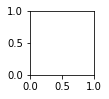

In [7]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i].transpose([1,2,0])
    plt.imshow(img)
    
# show the plot
plt.show()

In [10]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [9]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [12]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

W0915 17:19:07.005667  8952 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0915 17:19:07.535177  8952 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 17:19:07.713568  8952 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0915 17:19:08.031508  8952 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0915 17:19:08.073870  8952 deprecation.py:506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 32, 96)         27744     
_________________________________________________________________
activation_1 (Activation)    (None, 3, 32, 96)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 32, 96)         83040     
_________________________________________________________________
activation_2 (Activation)    (None, 3, 32, 96)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 16, 96)         83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 16, 96)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 16, 192)        166080    
__________

ValueError: Error when checking input: expected conv2d_1_input to have shape (3, 32, 32) but got array with shape (32, 32, 3)

In [14]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

OSError: Unable to open file (unable to open file: name = 'all_cnn_weights_0.9088_0.4994.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

ValueError: Error when checking input: expected conv2d_1_input to have shape (3, 32, 32) but got array with shape (32, 32, 3)

In [19]:
# print our predictions
print predictions

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(predictions)? (<ipython-input-19-b3e7655a7618>, line 2)

In [20]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

NameError: name 'predictions' is not defined

In [21]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print class_result

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(class_result)? (<ipython-input-21-32ac5a814ee3>, line 3)

NameError: name 'class_result' is not defined

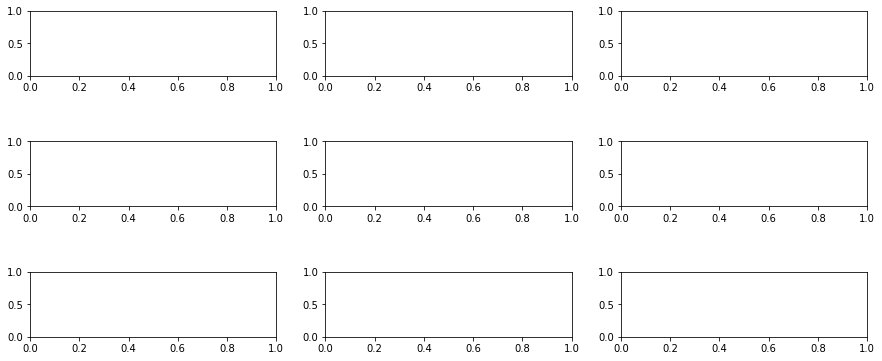

In [22]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([1,2,0]))
    
# show the plot
plt.show()